In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# # Code for producing files for validation
# p_val_threshold = 0.000001
# data = pd.read_csv('bfiles/ALL_COVID.clumped', delim_whitespace=True)
# data = data[data['P'] < p_val_threshold]

# gwas = pd.read_csv('bfiles/covid_meta_gwas.QC.txt', delim_whitespace=True)
# betas = pd.merge(data, gwas, how='left', on='SNP')
# betas.to_csv('validation_files/variant_effect_sizes.csv')

# variants = betas[['CHR_x', 'BP_x']]
# variants.to_csv('covid_variants.tab', sep='\t', index=False, header=False)

In [3]:
# # Extract genotypes for selected variants
# %%bash

# tabix -R covid_variants.tab -hf 'vcf/ALL_COVID19.vcf.gz' > 'filtered.vcf'

# bcftools query -e'AF<0.01' -e'AF>0.99' -f "[%GT\t]\n" filtered.vcf | \
#   sed 's/0|0/0/g' | sed 's/0|1/1/g' | sed 's/1|0/1/g' | sed 's/1|1/2/g' | \
#   grep -v "|" \
#   > filtered.tab
  
# bcftools query -l filtered.vcf > samples.txt

In [4]:
# Read in variants for the PRS
betas = pd.read_csv('variant_effect_sizes.csv')
print("Number of variants in PRS:", betas.shape[0])
betas.head(10)

Number of variants in PRS: 24


,Unnamed: 0,CHR_x,F,SNP,BP_x,P_x,TOTAL,NSIG,S05,S01,...,S0001,SP2,CHR_y,BP_y,A1,A2,N,P_y,BETA,MAF
0,0,3,1,3:46055716:G:A,46055716,9.190000e-28,42,0,0,10,...,30,"3:45909644:C:A(1),3:45910870:G:A(1),3:45937833...",3,46055716,G,A,711838,9.190000e-28,0.42317,0.11520
1,1,19,1,19:4719443:G:A,4719443,4.170000e-21,28,0,8,7,...,7,"19:4617890:T:C(1),19:4619925:T:G(1),19:4623325...",19,4719443,G,A,714592,4.174000e-21,0.24627,0.32790
2,2,21,1,21:34615210:T:C,34615210,1.300000e-14,115,69,0,0,...,44,"21:34589270:A:G(1),21:34593122:T:C(1),21:34595...",21,34615210,T,C,714592,1.301000e-14,-0.20152,0.66230
3,3,3,1,3:46388700:C:T,46388700,5.370000e-14,70,13,0,13,...,41,"3:46306474:T:C(1),3:46306700:T:C(1),3:46310840...",3,46388700,C,T,709095,5.370000e-14,0.43612,0.05754
4,4,12,1,12:113381956:C:T,113381956,3.310000e-13,29,3,0,1,...,24,"12:113351520:T:G(1),12:113352159:T:C(1),12:113...",12,113381956,C,T,714592,3.308000e-13,0.18936,0.67330
5,5,6,1,6:31121232:T:C,31121232,4.710000e-12,873,607,186,71,...,2,"6:31045717:C:T(1),6:31070884:G:T(1),6:31083107...",6,31121232,T,C,714592,4.713000e-12,0.27497,0.09981
6,6,3,1,3:45845748:A:C,45845748,4.760000e-12,7,6,0,0,...,1,3:45847241:A:G(1),3,45845748,A,C,703642,4.760000e-12,0.32435,0.09110
7,7,3,1,3:46068764:A:C,46068764,2.510000e-09,111,68,36,5,...,2,"3:45968668:C:T(1),3:45970409:A:G(1),3:46016599...",3,46068764,A,C,714592,2.512000e-09,0.14899,0.31890
8,8,17,1,17:47940666:C:T,47940666,8.600000e-09,28,7,3,1,...,10,"17:47787161:C:T(1),17:47788755:G:A(1),17:47804...",17,47940666,C,T,710955,8.597000e-09,0.39990,0.03468
9,9,12,1,12:103014757:C:A,103014757,2.600000e-08,114,94,10,10,...,0,"12:102991471:A:G(1),12:103014866:A:G(1),12:103...",12,103014757,C,A,474987,2.601000e-08,-0.20461,0.88540


In [5]:
# Extract genotypes and effect size for PRS variants in the 1000 Genomes samples test set
data = pd.read_csv('filtered.tab', sep='\t', header=None)
all_samples = pd.read_csv('samples.txt', header=None).to_numpy()
data.columns = np.append(all_samples, 'MAF')
data = data.set_index(betas['SNP'])
threshold = 0.04

validation = pd.read_csv('validation_set.txt', sep='\t')
validation_samples = validation['FID'].to_numpy()
data = data[data.columns.intersection(validation_samples)]
data['BETA'] = betas['BETA'].to_numpy()
data.head(10)

,HG00404,HG00442,HG00463,HG00478,HG00479,HG00530,HG00533,HG00536,HG00537,HG00542,...,NA19147,NA19153,NA19160,NA19200,NA19238,NA19247,NA19397,NA19434,NA19440,BETA
SNP,,,,,,,,,,,,,,,,,,,,,
3:46055716:G:A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.42317
19:4719443:G:A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.24627
21:34615210:T:C,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,-0.20152
3:46388700:C:T,1,0,1,0,0,1,0,1,1,1,...,1,2,0,2,2,2,2,2,2,0.43612
12:113381956:C:T,1,2,2,2,2,1,2,1,1,1,...,2,1,1,2,2,2,1,1,2,0.18936
6:31121232:T:C,0,0,0,0,0,1,2,0,0,0,...,0,1,0,1,0,1,0,1,0,0.27497
3:45845748:A:C,2,1,1,1,1,1,1,2,1,1,...,2,2,2,2,2,2,2,1,2,0.32435
3:46068764:A:C,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0.14899
17:47940666:C:T,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,1,1,0.39990


In [6]:
# Calculate PRS scores
scores = {}
for i in validation_samples:
    try:
        data[i]
    except KeyError:
        pass
    else:
        scores[i] = sum(data[i] * data['BETA'])/betas.shape[0]

In [7]:
# Generate binary predictions for the test set based off threshold obtained from the training set
valid = pd.DataFrame.from_dict(scores, orient='index')
valid['FID'] = valid.index

valid['Prediction'] = valid[0].apply(lambda x: 1 if x > threshold else 0)
valid[['FID', 'Prediction']].head(10)

,FID,Prediction
NA19147,NA19147,1
HG00533,HG00533,0
HG00537,HG00537,0
NA12761,NA12761,1
NA18923,NA18923,0
NA19138,NA19138,0
NA19247,NA19247,0
HG02260,HG02260,0
HG00692,HG00692,1
HG02600,HG02600,1


In [8]:
# Import ground truth labels for the test set
samples = valid['FID'].to_numpy()
validation = validation[validation['FID'].isin(samples)] 
validation['Prediction'] = valid[0].to_numpy()


validation_truth = validation['Blood.Type'].apply(lambda x: 1 if x == 0 else 0)

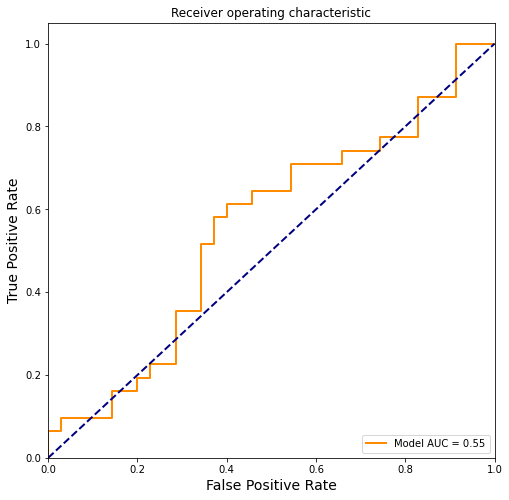

In [9]:
# Plot ROC curve and calculate AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(validation_truth, validation['Prediction'].to_numpy())
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize=(8,8))
lw = 2
ax.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Model AUC = %0.2f' % roc_auc)
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=14)
ax.set_ylabel('True Positive Rate', fontsize=14)
ax.set_title('Receiver operating characteristic')
ax.legend(loc="lower right")
fig.savefig('validation_AUC.png')

(array([1., 0., 1., 1., 1., 2., 0., 2., 1., 1., 2., 1., 1., 2., 0., 2., 3.,
        1., 0., 1.]),
 array([0.0858019 , 0.08729465, 0.08878741, 0.09028016, 0.09177292,
        0.09326567, 0.09475843, 0.09625119, 0.09774394, 0.09923669,
        0.10072945, 0.1022222 , 0.10371496, 0.10520771, 0.10670047,
        0.10819323, 0.10968598, 0.11117874, 0.11267149, 0.11416424,
        0.115657  ]),
 <BarContainer object of 20 artists>)

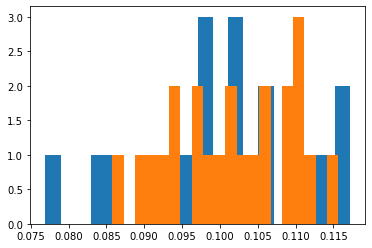

In [10]:
validation_profile = pd.read_csv('ALL_COVID.0.000001.profile', delim_whitespace=True)
validation_scores = pd.merge(validation, validation_profile, how='left', on='FID')
validation_scores = validation_scores.dropna()
true = validation_scores[validation_scores['Blood.Type'] == 1]
false = validation_scores[validation_scores['Blood.Type'] == 0]
plt.hist(true['SCORE'], bins=20, label='true')
plt.hist(false['SCORE'], bins=20, label='false')

In [11]:
# Calculate p-value for the PRS scores between the two populations
from scipy import stats
stats.ttest_ind(true['SCORE'], false['SCORE'])

Ttest_indResult(statistic=-0.21530765344610306, pvalue=0.8306494911976562)

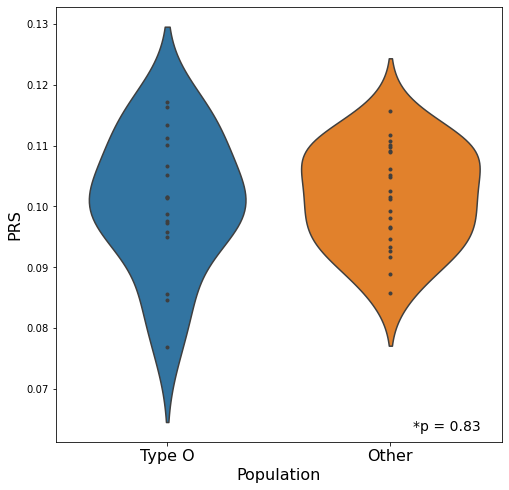

In [12]:
# Plot violin plot to see distribution of PRS scores for the two populations
import seaborn as sns
fig, axes = plt.subplots(figsize=(8,8))
axes = sns.violinplot(data=[true['SCORE'], false['SCORE']], ax = axes, inner='point')
axes.set_xticklabels(['Type O', 'Other'], fontsize=16)
axes.set_xlabel('Population', fontsize=16)
axes.set_ylabel('PRS', fontsize=16)
axes.text(0.80, 0.05, '*p = 0.83', transform=axes.transAxes, fontsize=14,
        verticalalignment='top')
plt.show()
fig.savefig('PRS_mean_violin.png')